In [22]:
library(Seurat)
library(ggplot2)
library(data.table)

In [23]:
#### Load counts and annotations for Batch #1, COH098 ####------------------
COH098.counts <- fread("./COH098_txt", header=T)
COH098.annot <- read.delim("./COH098_metadata.txt", header=T, fill=T)

In [24]:
dim(COH098.counts)
dim(COH098.annot)

[1]  32738 100567

[1] 100564     11

In [25]:
rownames(COH098.counts)[1:10]
colnames(COH098.counts)[1:10]

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

[1] "Gene"                   "Gene ID"                "Gene Symbol"           
 [4] "AB14C_AAACCCAAGAGGTTAT" "AB14C_AAACCCAAGAGTGACC" "AB14C_AAACCCAAGGCCTAAG"
 [7] "AB14C_AAACCCAAGTATCCTG" "AB14C_AAACCCAAGTCACACT" "AB14C_AAACCCAAGTCATACC"
[10] "AB14C_AAACCCACAACGTTAC"

In [26]:
gids <- COH098.counts$`Gene Symbol`
x <- which(gids != "")
dup <- which(duplicated(gids[x]))
x <- x[-dup]

COH098.counts <- COH098.counts[x, 4:ncol(COH098.counts)]
COH098.counts <- as.matrix(COH098.counts)
rownames(COH098.counts) <- gids[x]

In [27]:
dim(COH098.counts)
dim(COH098.annot)

[1]  22999 100564

[1] 100564     11

In [28]:
rownames(COH098.annot)<- COH098.annot$Cell

In [29]:
#### Create Seurat object ####
COH098.seurat <- CreateSeuratObject(COH098.counts, min.cells = 3, min.features = 50, meta.data = COH098.annot)

Warning message:
“The following arguments are not used: row.names”


In [30]:
rm(COH098.counts)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3065348,163.8,5692462,304.1,5692462,304.1
Vcells,669247809,5106.0,4722569968,36030.4,5901219971,45022.8


In [31]:
dim(COH098.seurat) 
mean(COH098.seurat$Percent.Mitochondria) 
median(COH098.seurat$Percent.Mitochondria)

[1]  20459 100560

[1] 18.2681

[1] 12.4

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



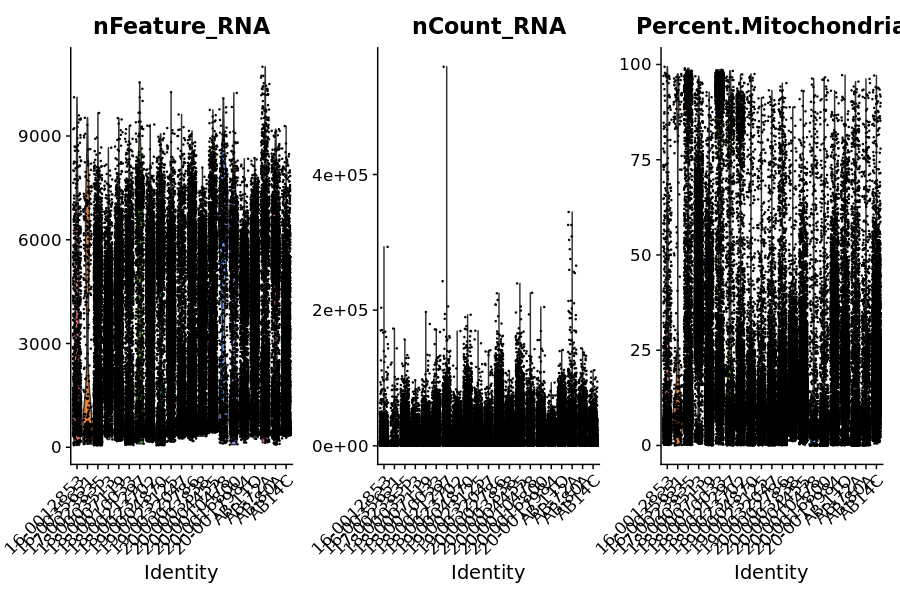

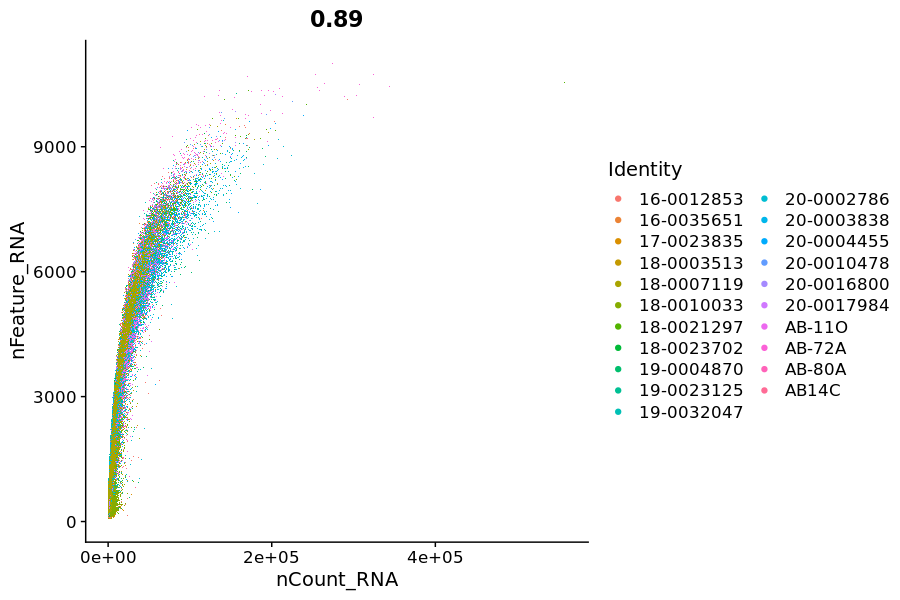

In [32]:
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)
#### QC Plots before filtering ####
VlnPlot(COH098.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH098.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [33]:
#### Export plots pre-filtering ####
pdf("./Figures/COH098.Seurat.PreQC.pdf", width=16, height=12)
VlnPlot(COH098.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH098.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH098.seurat$Sample), horiz = T, las=2)
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [34]:
#### Filter ####
COH098.seurat <- subset(x=COH098.seurat, 
                       nCount_RNA > 1000 & 
                       nCount_RNA < 80000 & 
                       nFeature_RNA > 500 &
                       Percent.Mitochondria < 50)

In [35]:
dim(COH098.seurat)

[1] 20459 52090

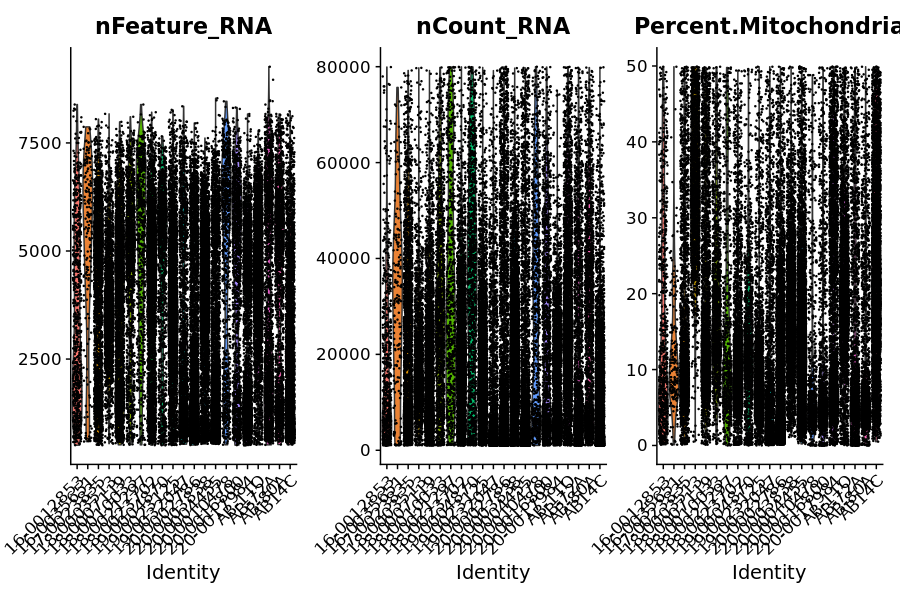

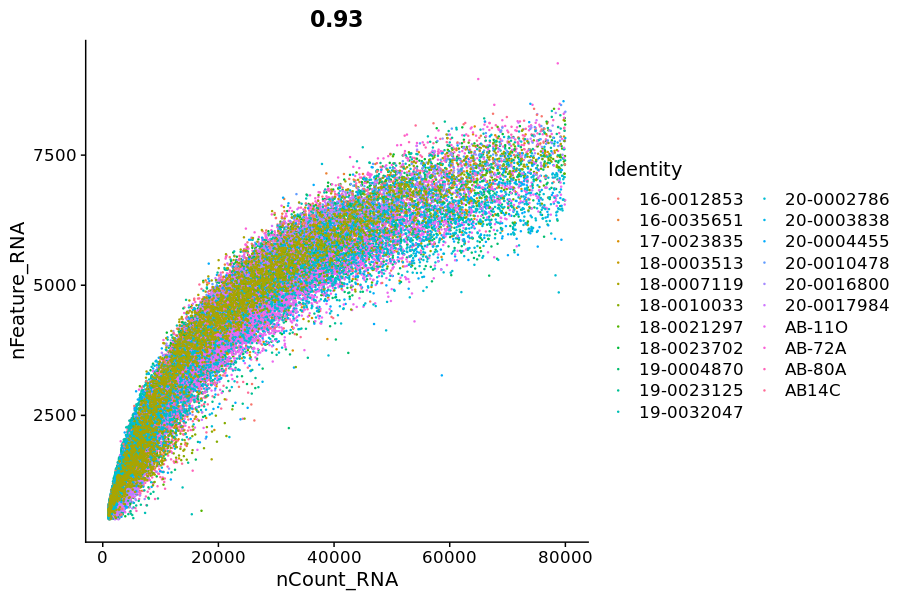

In [36]:
#### QC Plots after filtering ####
VlnPlot(COH098.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH098.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [37]:
pdf("./Figures/COH098.Seurat.AfterQC.pdf", width=16, height=12)
VlnPlot(COH098.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH098.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH098.seurat$Sample), horiz = T, las=2)
dev.off()

png 
  2

In [56]:
#saveRDS(COH098.seurat, file="COH098.seurat")

In [20]:
library(qs)

qs v0.25.1.



In [38]:
qsave(COH098.seurat, "COH098.seurat_v2.qs", nthreads=16)